In [0]:
# model simple CNN with dropout and data augmentation

In [0]:
import os
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [12]:
# define parameters
IMAGE_SIZE = 150
BATCH_SIZE = 20
NUM_EPOCHS = 100
TOTAL_TRAIN_IMAGES = 2000
TOTAL_VALID_IMAGES = 1000
TOTAL_TEST_IMAGES = 1000

base_dir = 'drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle'
model_dir = os.path.join(base_dir, 'model_checkpoint/scratch_aug_100epochs')
dataset_dir = os.path.join(base_dir, 'Dataset')
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'valid')
test_dir =  os.path.join(dataset_dir, 'test')

print(len(os.listdir(train_dir)))
print(len(os.listdir(model_dir)))

2
0


In [11]:
# define model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

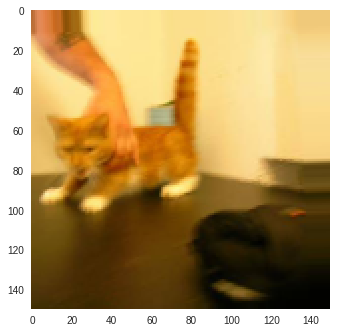

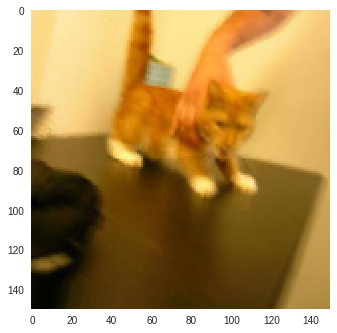

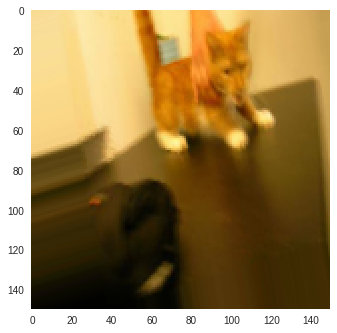

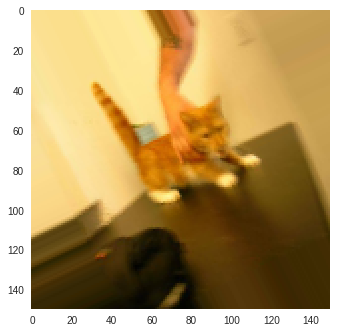

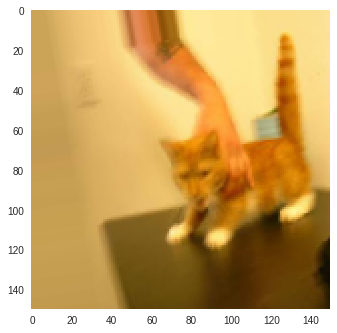

In [13]:
# test data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img_path = os.path.join(train_dir, 'cat/cat.0.jpg')
# read image from disk and resize
img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
# convert to Numpy array with shape (IMAGE_SIZE, IMAGE_SIZE, 3)
x = image.img_to_array(img)
# reshape it to (1, IMAGE_SIZE, IMAGE_SIZE, 3)
x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  plt.grid(False)
  img_plot = plt.imshow(image.array_to_img(batch[0]))
  
  i += 1
  if i >= 5:
    break


plt.show()

In [19]:
# using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# define model checkpoint
checkpoint_path = os.path.join(model_dir, 'valid-acc-improvement-{epoch:02d}-{val_acc:.2f}.hdf5')
val_acc_checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
# fit model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=TOTAL_TRAIN_IMAGES // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    callbacks=[val_acc_checkpoint],
    validation_data=validation_generator,
    validation_steps=TOTAL_VALID_IMAGES // BATCH_SIZE,
)

Epoch 1/100
100/100 [==============================] - 1583s 16s/step - loss: 0.6909 - acc: 0.5055 - val_loss: 0.6753 - val_acc: 0.5770

Epoch 00001: val_acc improved from -inf to 0.57700, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-01-0.58.hdf5
Epoch 2/100
100/100 [==============================] - 36s 358ms/step - loss: 0.6735 - acc: 0.5615 - val_loss: 0.6735 - val_acc: 0.5560

Epoch 00002: val_acc did not improve from 0.57700
Epoch 3/100
 76/100 [=====================>........] - ETA: 6s - loss: 0.6606 - acc: 0.5743

100/100 [==============================] - 36s 361ms/step - loss: 0.6585 - acc: 0.5820 - val_loss: 0.6586 - val_acc: 0.5750

Epoch 00003: val_acc did not improve from 0.57700
Epoch 4/100
100/100 [==============================] - 36s 359ms/step - loss: 0.6489 - acc: 0.5985 - val_loss: 0.6334 - val_acc: 0.6220

Epoch 00004: val_acc improved from 0.57700 to 0.62200, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-04-0.62.hdf5
Epoch 5/100
100/100 [==============================] - 36s 355ms/step - loss: 0.6356 - acc: 0.6315 - val_loss: 0.6183 - val_acc: 0.6390

Epoch 00005: val_acc improved from 0.62200 to 0.63900, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-05-0.64.hdf5
Epoch 6/100
  9/100 [=>............................] - ETA: 5s - loss: 0.6126 - acc: 0.6667

100/100 [==============================] - 37s 367ms/step - loss: 0.6198 - acc: 0.6515 - val_loss: 0.6498 - val_acc: 0.5980

Epoch 00006: val_acc did not improve from 0.63900
Epoch 7/100
100/100 [==============================] - 35s 350ms/step - loss: 0.6105 - acc: 0.6750 - val_loss: 0.5764 - val_acc: 0.6910

Epoch 00007: val_acc improved from 0.63900 to 0.69100, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-07-0.69.hdf5
Epoch 8/100
100/100 [==============================] - 36s 360ms/step - loss: 0.6023 - acc: 0.6765 - val_loss: 0.6177 - val_acc: 0.6460

Epoch 00008: val_acc did not improve from 0.69100
Epoch 9/100
  8/100 [=>............................] - ETA: 5s - loss: 0.5855 - acc: 0.6688

100/100 [==============================] - 36s 359ms/step - loss: 0.5974 - acc: 0.6760 - val_loss: 0.5672 - val_acc: 0.6870

Epoch 00009: val_acc did not improve from 0.69100
Epoch 10/100
100/100 [==============================] - 36s 355ms/step - loss: 0.5830 - acc: 0.6840 - val_loss: 0.5734 - val_acc: 0.6890

Epoch 00010: val_acc did not improve from 0.69100
Epoch 11/100
100/100 [==============================] - 38s 380ms/step - loss: 0.5785 - acc: 0.6975 - val_loss: 0.5904 - val_acc: 0.6760

Epoch 00011: val_acc did not improve from 0.69100
Epoch 12/100
 35/100 [=========>....................] - ETA: 13s - loss: 0.5776 - acc: 0.6986

100/100 [==============================] - 36s 360ms/step - loss: 0.5812 - acc: 0.6920 - val_loss: 0.5810 - val_acc: 0.6800

Epoch 00012: val_acc did not improve from 0.69100
Epoch 13/100
100/100 [==============================] - 35s 355ms/step - loss: 0.5713 - acc: 0.7015 - val_loss: 0.5890 - val_acc: 0.6740

Epoch 00013: val_acc did not improve from 0.69100
Epoch 14/100
100/100 [==============================] - 36s 356ms/step - loss: 0.5631 - acc: 0.7040 - val_loss: 0.5420 - val_acc: 0.7180

Epoch 00014: val_acc improved from 0.69100 to 0.71800, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-14-0.72.hdf5
Epoch 15/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.5544 - acc: 0.7120

100/100 [==============================] - 36s 357ms/step - loss: 0.5693 - acc: 0.6980 - val_loss: 0.5647 - val_acc: 0.6980

Epoch 00015: val_acc did not improve from 0.71800
Epoch 16/100
100/100 [==============================] - 36s 358ms/step - loss: 0.5498 - acc: 0.7185 - val_loss: 0.5283 - val_acc: 0.7320

Epoch 00016: val_acc improved from 0.71800 to 0.73200, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-16-0.73.hdf5
Epoch 17/100
100/100 [==============================] - 36s 364ms/step - loss: 0.5538 - acc: 0.7250 - val_loss: 0.5663 - val_acc: 0.7170

Epoch 00017: val_acc did not improve from 0.73200
Epoch 18/100
  8/100 [=>............................] - ETA: 5s - loss: 0.5159 - acc: 0.7500

100/100 [==============================] - 35s 355ms/step - loss: 0.5516 - acc: 0.7270 - val_loss: 0.5394 - val_acc: 0.7200

Epoch 00018: val_acc did not improve from 0.73200
Epoch 19/100
100/100 [==============================] - 36s 359ms/step - loss: 0.5528 - acc: 0.7115 - val_loss: 0.5403 - val_acc: 0.7180

Epoch 00019: val_acc did not improve from 0.73200
Epoch 20/100
100/100 [==============================] - 35s 351ms/step - loss: 0.5428 - acc: 0.7200 - val_loss: 0.5109 - val_acc: 0.7460

Epoch 00020: val_acc improved from 0.73200 to 0.74600, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-20-0.75.hdf5
Epoch 21/100
 23/100 [=====>........................] - ETA: 13s - loss: 0.5213 - acc: 0.7391

100/100 [==============================] - 36s 356ms/step - loss: 0.5252 - acc: 0.7475 - val_loss: 0.5148 - val_acc: 0.7390

Epoch 00021: val_acc did not improve from 0.74600
Epoch 22/100
100/100 [==============================] - 36s 362ms/step - loss: 0.5397 - acc: 0.7250 - val_loss: 0.5115 - val_acc: 0.7470

Epoch 00022: val_acc improved from 0.74600 to 0.74700, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-22-0.75.hdf5
Epoch 23/100
100/100 [==============================] - 36s 361ms/step - loss: 0.5348 - acc: 0.7280 - val_loss: 0.5109 - val_acc: 0.7420

Epoch 00023: val_acc did not improve from 0.74700
Epoch 24/100
  6/100 [>.............................] - ETA: 5s - loss: 0.5031 - acc: 0.7500

100/100 [==============================] - 35s 353ms/step - loss: 0.5198 - acc: 0.7375 - val_loss: 0.5503 - val_acc: 0.7180

Epoch 00024: val_acc did not improve from 0.74700
Epoch 25/100
100/100 [==============================] - 36s 361ms/step - loss: 0.5384 - acc: 0.7250 - val_loss: 0.5135 - val_acc: 0.7330

Epoch 00025: val_acc did not improve from 0.74700
Epoch 26/100
100/100 [==============================] - 35s 346ms/step - loss: 0.5309 - acc: 0.7275 - val_loss: 0.5214 - val_acc: 0.7420

Epoch 00026: val_acc did not improve from 0.74700
Epoch 27/100
 33/100 [========>.....................] - ETA: 13s - loss: 0.5296 - acc: 0.7439

100/100 [==============================] - 36s 361ms/step - loss: 0.5192 - acc: 0.7395 - val_loss: 0.5858 - val_acc: 0.7040

Epoch 00027: val_acc did not improve from 0.74700
Epoch 28/100
100/100 [==============================] - 35s 350ms/step - loss: 0.5127 - acc: 0.7520 - val_loss: 0.5411 - val_acc: 0.7170

Epoch 00028: val_acc did not improve from 0.74700
Epoch 29/100
100/100 [==============================] - 36s 360ms/step - loss: 0.5100 - acc: 0.7500 - val_loss: 0.4737 - val_acc: 0.7770

Epoch 00029: val_acc improved from 0.74700 to 0.77700, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-29-0.78.hdf5
Epoch 30/100
 25/100 [======>.......................] - ETA: 13s - loss: 0.4988 - acc: 0.7620

100/100 [==============================] - 36s 358ms/step - loss: 0.5094 - acc: 0.7575 - val_loss: 0.4996 - val_acc: 0.7480

Epoch 00030: val_acc did not improve from 0.77700
Epoch 31/100
100/100 [==============================] - 35s 351ms/step - loss: 0.5038 - acc: 0.7430 - val_loss: 0.5087 - val_acc: 0.7500

Epoch 00031: val_acc did not improve from 0.77700
Epoch 32/100
100/100 [==============================] - 36s 362ms/step - loss: 0.5147 - acc: 0.7400 - val_loss: 0.4961 - val_acc: 0.7620

Epoch 00032: val_acc did not improve from 0.77700
Epoch 33/100
 35/100 [=========>....................] - ETA: 12s - loss: 0.4734 - acc: 0.7886

100/100 [==============================] - 35s 352ms/step - loss: 0.4907 - acc: 0.7610 - val_loss: 0.5851 - val_acc: 0.7070

Epoch 00033: val_acc did not improve from 0.77700
Epoch 34/100
100/100 [==============================] - 36s 358ms/step - loss: 0.5066 - acc: 0.7640 - val_loss: 0.6224 - val_acc: 0.7150

Epoch 00034: val_acc did not improve from 0.77700
Epoch 35/100
100/100 [==============================] - 36s 356ms/step - loss: 0.5013 - acc: 0.7615 - val_loss: 0.4716 - val_acc: 0.7730

Epoch 00035: val_acc did not improve from 0.77700
Epoch 36/100
 35/100 [=========>....................] - ETA: 12s - loss: 0.4874 - acc: 0.7443

100/100 [==============================] - 36s 356ms/step - loss: 0.5032 - acc: 0.7440 - val_loss: 0.4888 - val_acc: 0.7680

Epoch 00036: val_acc did not improve from 0.77700
Epoch 37/100
100/100 [==============================] - 36s 358ms/step - loss: 0.4893 - acc: 0.7650 - val_loss: 0.4701 - val_acc: 0.7720

Epoch 00037: val_acc did not improve from 0.77700
Epoch 38/100
100/100 [==============================] - 36s 355ms/step - loss: 0.4888 - acc: 0.7705 - val_loss: 0.4935 - val_acc: 0.7660

Epoch 00038: val_acc did not improve from 0.77700
Epoch 39/100
 34/100 [=========>....................] - ETA: 13s - loss: 0.4921 - acc: 0.7691

100/100 [==============================] - 35s 353ms/step - loss: 0.4923 - acc: 0.7680 - val_loss: 0.4641 - val_acc: 0.7770

Epoch 00039: val_acc improved from 0.77700 to 0.77700, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-39-0.78.hdf5
Epoch 40/100
100/100 [==============================] - 36s 365ms/step - loss: 0.4795 - acc: 0.7750 - val_loss: 0.4462 - val_acc: 0.7760

Epoch 00040: val_acc did not improve from 0.77700
Epoch 41/100
 85/100 [========================>.....] - ETA: 3s - loss: 0.4909 - acc: 0.7471

100/100 [==============================] - 35s 351ms/step - loss: 0.4962 - acc: 0.7500 - val_loss: 0.4914 - val_acc: 0.7640

Epoch 00041: val_acc did not improve from 0.77700
Epoch 42/100
100/100 [==============================] - 36s 361ms/step - loss: 0.4881 - acc: 0.7775 - val_loss: 0.5549 - val_acc: 0.7230

Epoch 00042: val_acc did not improve from 0.77700
Epoch 43/100
100/100 [==============================] - 35s 348ms/step - loss: 0.4928 - acc: 0.7640 - val_loss: 0.4520 - val_acc: 0.7840

Epoch 00043: val_acc improved from 0.77700 to 0.78400, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-43-0.78.hdf5
Epoch 44/100
 31/100 [========>.....................] - ETA: 15s - loss: 0.4652 - acc: 0.7806

100/100 [==============================] - 36s 361ms/step - loss: 0.4701 - acc: 0.7730 - val_loss: 0.5221 - val_acc: 0.7460

Epoch 00044: val_acc did not improve from 0.78400
Epoch 45/100
100/100 [==============================] - 36s 361ms/step - loss: 0.4799 - acc: 0.7610 - val_loss: 0.4524 - val_acc: 0.7860

Epoch 00045: val_acc improved from 0.78400 to 0.78600, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-45-0.79.hdf5
Epoch 46/100
100/100 [==============================] - 35s 354ms/step - loss: 0.4701 - acc: 0.7650 - val_loss: 0.4427 - val_acc: 0.7900

Epoch 00046: val_acc improved from 0.78600 to 0.79000, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-46-0.79.hdf5
Epoch 47/100
  4/100 [>.............................] - ETA: 6s - loss: 0.5818 - acc: 0.7000

100/100 [==============================] - 36s 365ms/step - loss: 0.4662 - acc: 0.7755 - val_loss: 0.4611 - val_acc: 0.7710

Epoch 00047: val_acc did not improve from 0.79000
Epoch 48/100
100/100 [==============================] - 36s 360ms/step - loss: 0.4755 - acc: 0.7710 - val_loss: 0.4874 - val_acc: 0.7670

Epoch 00048: val_acc did not improve from 0.79000
Epoch 49/100
100/100 [==============================] - 35s 352ms/step - loss: 0.4612 - acc: 0.7805 - val_loss: 0.4643 - val_acc: 0.7760

Epoch 00049: val_acc did not improve from 0.79000
Epoch 50/100
 30/100 [========>.....................] - ETA: 12s - loss: 0.4792 - acc: 0.7800

100/100 [==============================] - 36s 355ms/step - loss: 0.4753 - acc: 0.7695 - val_loss: 0.4326 - val_acc: 0.7990

Epoch 00050: val_acc improved from 0.79000 to 0.79900, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-50-0.80.hdf5
Epoch 51/100
100/100 [==============================] - 36s 361ms/step - loss: 0.4749 - acc: 0.7635 - val_loss: 0.4423 - val_acc: 0.7960

Epoch 00051: val_acc did not improve from 0.79900
Epoch 52/100
 86/100 [========================>.....] - ETA: 3s - loss: 0.4616 - acc: 0.7820

100/100 [==============================] - 36s 361ms/step - loss: 0.4608 - acc: 0.7815 - val_loss: 0.5045 - val_acc: 0.7490

Epoch 00052: val_acc did not improve from 0.79900
Epoch 53/100
100/100 [==============================] - 36s 358ms/step - loss: 0.4510 - acc: 0.7930 - val_loss: 0.4486 - val_acc: 0.7950

Epoch 00053: val_acc did not improve from 0.79900
Epoch 54/100
100/100 [==============================] - 35s 350ms/step - loss: 0.4496 - acc: 0.7865 - val_loss: 0.4841 - val_acc: 0.7620

Epoch 00054: val_acc did not improve from 0.79900
Epoch 55/100
 44/100 [============>.................] - ETA: 12s - loss: 0.4473 - acc: 0.7966

100/100 [==============================] - 36s 362ms/step - loss: 0.4457 - acc: 0.7955 - val_loss: 0.5488 - val_acc: 0.7460

Epoch 00055: val_acc did not improve from 0.79900
Epoch 56/100
100/100 [==============================] - 36s 355ms/step - loss: 0.4575 - acc: 0.7815 - val_loss: 0.4452 - val_acc: 0.7840

Epoch 00056: val_acc did not improve from 0.79900
Epoch 57/100
100/100 [==============================] - 36s 357ms/step - loss: 0.4380 - acc: 0.7935 - val_loss: 0.4301 - val_acc: 0.8040

Epoch 00057: val_acc improved from 0.79900 to 0.80400, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-57-0.80.hdf5
Epoch 58/100
 27/100 [=======>......................] - ETA: 13s - loss: 0.4261 - acc: 0.8074

100/100 [==============================] - 36s 362ms/step - loss: 0.4503 - acc: 0.7930 - val_loss: 0.4073 - val_acc: 0.8190

Epoch 00058: val_acc improved from 0.80400 to 0.81900, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-58-0.82.hdf5
Epoch 59/100
100/100 [==============================] - 35s 352ms/step - loss: 0.4339 - acc: 0.8030 - val_loss: 0.5052 - val_acc: 0.7550

Epoch 00059: val_acc did not improve from 0.81900
Epoch 60/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4589 - acc: 0.7768

100/100 [==============================] - 36s 359ms/step - loss: 0.4528 - acc: 0.7805 - val_loss: 0.4523 - val_acc: 0.7920

Epoch 00060: val_acc did not improve from 0.81900
Epoch 61/100
100/100 [==============================] - 35s 351ms/step - loss: 0.4323 - acc: 0.8055 - val_loss: 0.4399 - val_acc: 0.7940

Epoch 00061: val_acc did not improve from 0.81900
Epoch 62/100
100/100 [==============================] - 36s 362ms/step - loss: 0.4440 - acc: 0.7880 - val_loss: 0.4664 - val_acc: 0.7760

Epoch 00062: val_acc did not improve from 0.81900
Epoch 63/100
 43/100 [===========>..................] - ETA: 11s - loss: 0.4279 - acc: 0.8081

100/100 [==============================] - 35s 352ms/step - loss: 0.4420 - acc: 0.7995 - val_loss: 0.4431 - val_acc: 0.8010

Epoch 00063: val_acc did not improve from 0.81900
Epoch 64/100
100/100 [==============================] - 35s 349ms/step - loss: 0.4369 - acc: 0.7945 - val_loss: 0.4680 - val_acc: 0.7870

Epoch 00064: val_acc did not improve from 0.81900
Epoch 65/100
100/100 [==============================] - 36s 359ms/step - loss: 0.4358 - acc: 0.8020 - val_loss: 0.4413 - val_acc: 0.7900

Epoch 00065: val_acc did not improve from 0.81900
Epoch 66/100
 35/100 [=========>....................] - ETA: 13s - loss: 0.4133 - acc: 0.8086

100/100 [==============================] - 35s 350ms/step - loss: 0.4237 - acc: 0.7995 - val_loss: 0.4504 - val_acc: 0.7790

Epoch 00066: val_acc did not improve from 0.81900
Epoch 67/100
100/100 [==============================] - 36s 356ms/step - loss: 0.4367 - acc: 0.7990 - val_loss: 0.5010 - val_acc: 0.7710

Epoch 00067: val_acc did not improve from 0.81900
Epoch 68/100
100/100 [==============================] - 36s 360ms/step - loss: 0.4427 - acc: 0.7975 - val_loss: 0.4420 - val_acc: 0.7860

Epoch 00068: val_acc did not improve from 0.81900
Epoch 69/100
 36/100 [=========>....................] - ETA: 13s - loss: 0.4105 - acc: 0.8167

100/100 [==============================] - 35s 349ms/step - loss: 0.4217 - acc: 0.8095 - val_loss: 0.4286 - val_acc: 0.8070

Epoch 00069: val_acc did not improve from 0.81900
Epoch 70/100
100/100 [==============================] - 36s 359ms/step - loss: 0.4224 - acc: 0.7970 - val_loss: 0.4159 - val_acc: 0.8150

Epoch 00070: val_acc did not improve from 0.81900
Epoch 71/100
100/100 [==============================] - 35s 347ms/step - loss: 0.4264 - acc: 0.8055 - val_loss: 0.4379 - val_acc: 0.7920

Epoch 00071: val_acc did not improve from 0.81900
Epoch 72/100
 35/100 [=========>....................] - ETA: 13s - loss: 0.3993 - acc: 0.8043

100/100 [==============================] - 36s 358ms/step - loss: 0.4182 - acc: 0.8015 - val_loss: 0.4237 - val_acc: 0.8080

Epoch 00072: val_acc did not improve from 0.81900
Epoch 73/100
100/100 [==============================] - 35s 350ms/step - loss: 0.4321 - acc: 0.7965 - val_loss: 0.5446 - val_acc: 0.7410

Epoch 00073: val_acc did not improve from 0.81900
Epoch 74/100
100/100 [==============================] - 36s 356ms/step - loss: 0.4205 - acc: 0.8190 - val_loss: 0.4387 - val_acc: 0.8000

Epoch 00074: val_acc did not improve from 0.81900
Epoch 75/100
 35/100 [=========>....................] - ETA: 13s - loss: 0.4236 - acc: 0.7957

100/100 [==============================] - 35s 351ms/step - loss: 0.4098 - acc: 0.8155 - val_loss: 0.4727 - val_acc: 0.7850

Epoch 00075: val_acc did not improve from 0.81900
Epoch 76/100
100/100 [==============================] - 35s 354ms/step - loss: 0.4023 - acc: 0.8275 - val_loss: 0.4587 - val_acc: 0.7910

Epoch 00076: val_acc did not improve from 0.81900
Epoch 77/100
100/100 [==============================] - 35s 350ms/step - loss: 0.4195 - acc: 0.7975 - val_loss: 0.4515 - val_acc: 0.8020

Epoch 00077: val_acc did not improve from 0.81900
Epoch 78/100
 36/100 [=========>....................] - ETA: 13s - loss: 0.3873 - acc: 0.8139

100/100 [==============================] - 36s 358ms/step - loss: 0.4004 - acc: 0.8205 - val_loss: 0.4051 - val_acc: 0.8190

Epoch 00078: val_acc did not improve from 0.81900
Epoch 79/100
100/100 [==============================] - 36s 357ms/step - loss: 0.4104 - acc: 0.8075 - val_loss: 0.4204 - val_acc: 0.8060

Epoch 00079: val_acc did not improve from 0.81900
Epoch 80/100
100/100 [==============================] - 36s 358ms/step - loss: 0.4008 - acc: 0.8175 - val_loss: 0.4150 - val_acc: 0.8190

Epoch 00080: val_acc did not improve from 0.81900
Epoch 81/100
 35/100 [=========>....................] - ETA: 12s - loss: 0.4260 - acc: 0.8214

100/100 [==============================] - 35s 345ms/step - loss: 0.4056 - acc: 0.8210 - val_loss: 0.4400 - val_acc: 0.8030

Epoch 00081: val_acc did not improve from 0.81900
Epoch 82/100
100/100 [==============================] - 36s 358ms/step - loss: 0.4000 - acc: 0.8165 - val_loss: 0.4265 - val_acc: 0.8140

Epoch 00082: val_acc did not improve from 0.81900
Epoch 83/100
100/100 [==============================] - 35s 350ms/step - loss: 0.4161 - acc: 0.8190 - val_loss: 0.4570 - val_acc: 0.7980

Epoch 00083: val_acc did not improve from 0.81900
Epoch 84/100
 34/100 [=========>....................] - ETA: 14s - loss: 0.4005 - acc: 0.8235

100/100 [==============================] - 35s 354ms/step - loss: 0.4101 - acc: 0.8155 - val_loss: 0.4243 - val_acc: 0.8050

Epoch 00084: val_acc did not improve from 0.81900
Epoch 85/100
100/100 [==============================] - 35s 355ms/step - loss: 0.3952 - acc: 0.8210 - val_loss: 0.4611 - val_acc: 0.7850

Epoch 00085: val_acc did not improve from 0.81900
Epoch 86/100
100/100 [==============================] - 35s 349ms/step - loss: 0.3974 - acc: 0.8220 - val_loss: 0.4601 - val_acc: 0.7870

Epoch 00086: val_acc did not improve from 0.81900
Epoch 87/100
 35/100 [=========>....................] - ETA: 12s - loss: 0.4220 - acc: 0.8100

100/100 [==============================] - 36s 359ms/step - loss: 0.3940 - acc: 0.8255 - val_loss: 0.4245 - val_acc: 0.8060

Epoch 00087: val_acc did not improve from 0.81900
Epoch 88/100
100/100 [==============================] - 35s 351ms/step - loss: 0.3921 - acc: 0.8255 - val_loss: 0.4660 - val_acc: 0.8050

Epoch 00088: val_acc did not improve from 0.81900
Epoch 89/100
100/100 [==============================] - 36s 360ms/step - loss: 0.3952 - acc: 0.8230 - val_loss: 0.4471 - val_acc: 0.8000

Epoch 00089: val_acc did not improve from 0.81900
Epoch 90/100
 34/100 [=========>....................] - ETA: 13s - loss: 0.3922 - acc: 0.8294

100/100 [==============================] - 35s 351ms/step - loss: 0.3837 - acc: 0.8230 - val_loss: 0.4895 - val_acc: 0.7990

Epoch 00090: val_acc did not improve from 0.81900
Epoch 91/100
100/100 [==============================] - 36s 357ms/step - loss: 0.4073 - acc: 0.8120 - val_loss: 0.4203 - val_acc: 0.8140

Epoch 00091: val_acc did not improve from 0.81900
Epoch 92/100
100/100 [==============================] - 35s 351ms/step - loss: 0.3868 - acc: 0.8245 - val_loss: 0.4883 - val_acc: 0.7910

Epoch 00092: val_acc did not improve from 0.81900
Epoch 93/100
 34/100 [=========>....................] - ETA: 13s - loss: 0.3964 - acc: 0.8059

100/100 [==============================] - 35s 353ms/step - loss: 0.3900 - acc: 0.8185 - val_loss: 0.4098 - val_acc: 0.8230

Epoch 00093: val_acc improved from 0.81900 to 0.82300, saving model to drive/workspace/Cloud_Service/Google_Colab/DogVsCat_Kaggle/model_checkpoint/scratch_aug_100epochs/valid-acc-improvement-93-0.82.hdf5
Epoch 94/100
100/100 [==============================] - 85s 847ms/step - loss: 0.3879 - acc: 0.8385 - val_loss: 0.4403 - val_acc: 0.8030

Epoch 00094: val_acc did not improve from 0.82300
Epoch 95/100
 86/100 [========================>.....] - ETA: 3s - loss: 0.3831 - acc: 0.8291

 94/100 [===========================>..] - ETA: 1s - loss: 0.3739 - acc: 0.8335

In [0]:
model.save(os.path.join(model_dir, 'model_with_aug1.h5'))

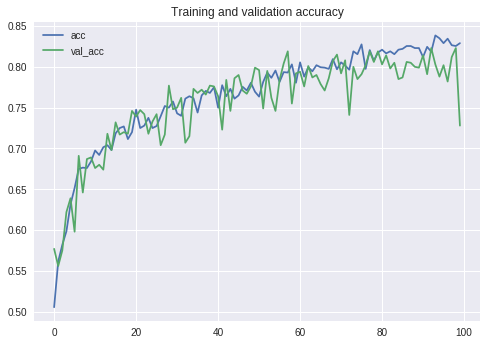

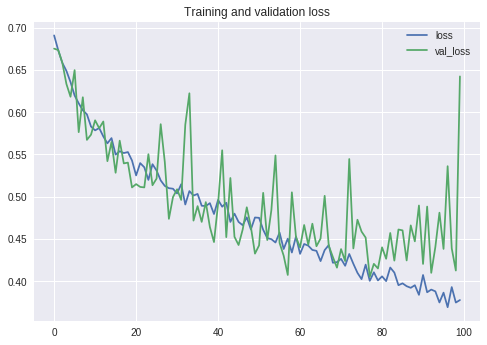

In [17]:
# plot history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

fig = plt.figure()

plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and validation accuracy')
plt.legend()

fig.savefig(os.path.join(model_dir, 'Training_Validation_Accuracy.jpg'))

fig = plt.figure()

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.legend()

fig.savefig(os.path.join(model_dir, 'Training_Validation_Loss.jpg'))

plt.show()

In [20]:
# evalute model with test data
scores = model.evaluate_generator(test_generator, steps=TOTAL_TEST_IMAGES // BATCH_SIZE)
print(scores)

[0.6687702798843383, 0.7470000016689301]


In [0]:
# load best validation model
best_val_model_path = os.path.join(model_dir, 'valid-acc-improvement-93-0.82.hdf5')
model2 = models.load_model(best_val_model_path)


In [23]:
# evaluate model
scores2 = model2.evaluate_generator(test_generator, steps=TOTAL_TEST_IMAGES // BATCH_SIZE)
print(scores2)

[0.4764738729596138, 0.8090000009536743]
